# Data Preprocessing and Exploratory Data Analysis

## Data preprocessing
- Data samples: the first five and last data samples.  
- Conduct data preprocessing that include but are not limited to data cleaning, normalization, discretization, and handling non-numerical data.  

In [1]:
# Library import

import numpy as np
import pandas as pd
import kaggle.cli
import sys
from sklearn import preprocessing
from pathlib import Path
from zipfile import ZipFile
from IPython.display import display, HTML

In [2]:
'''
data_A = pd.read_csv('../rawdata/vehicles.csv') # file name
print(data_A.shape)
print(data_A.isnull().sum()) # see what is missing from data
print(data_A.count())
'''

!kaggle datasets download -d austinreese/craigslist-carstrucks-data

file_name = 'craigslist-carstrucks-data.zip' # dataset name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
    
data_A = pd.read_csv('vehicles.csv') # file name

drop = {'id', 'url', 'region_url', 'image_url', 'county', 'posting_date', 'description', 'title_status'}

for field in drop:
    if field in data_A.columns:
        data_A = data_A.drop(field,1)

data_A = data_A.dropna(subset=['manufacturer', 'model', 'condition', 'odometer'])

print(data_A.isnull().sum()) # see what is missing from data
print(data_A.count())

100%|███████████████████████████████████████▉| 262M/262M [00:04<00:00, 56.9MB/s]
100%|████████████████████████████████████████| 262M/262M [00:04<00:00, 59.1MB/s]
Done


/var/folders/6r/yn9sdrfs54ngrrx_58slj4pc0000gs/T/ipykernel_42266/3332886989.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_A = data_A.drop(field,1)


region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders        66629
fuel                16
odometer             0
transmission        31
VIN              91803
drive            57382
size            147387
type             29357
paint_color      48397
state                0
lat                931
long               931
dtype: int64
region          237800
price           237800
year            237800
manufacturer    237800
model           237800
condition       237800
cylinders       171171
fuel            237784
odometer        237800
transmission    237769
VIN             145997
drive           180418
size             90413
type            208443
paint_color     189403
state           237800
lat             236869
long            236869
dtype: int64


In [3]:
# drop attributes that are not relevant
drop = {'id', 'url', 'region_url', 'image_url', 'lat', 'long', \
        'county', 'posting_date', 'description', 'title_status'}

for field in drop:
    if field in data_A.columns:
        data_A = data_A.drop(field,1)

# Drop entries that are missing required values
data_A = data_A.dropna(subset=['manufacturer', 'model', 'condition', 'odometer'])

/var/folders/6r/yn9sdrfs54ngrrx_58slj4pc0000gs/T/ipykernel_42266/2869951456.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_A = data_A.drop(field,1)


In [4]:
data_B = pd.read_csv('../rawdata/true_car_listings.csv') # file name
print(data_B.shape)
print(data_B.isnull().sum()) # see what is missing from data
print(data_B.count())

'''
!kaggle datasets download -d harikrishnareddyb/used-car-price-predictions

file_name = 'used-car-price-predictions.zip' # dataset name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
    
data_B = pd.read_csv('true_car_listings.csv') # file name

print(data_B.isnull().sum()) # see what is missing from data
print(data_B.count())
'''

(852122, 8)
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64
Price      852122
Year       852122
Mileage    852122
City       852122
State      852122
Vin        852122
Make       852122
Model      852122
dtype: int64


"\n!kaggle datasets download -d harikrishnareddyb/used-car-price-predictions\n\nfile_name = 'used-car-price-predictions.zip' # dataset name\nwith ZipFile(file_name, 'r') as zip:\n  zip.extractall()\n  print('Done')\n    \ndata_B = pd.read_csv('true_car_listings.csv') # file name\n\nprint(data_B.isnull().sum()) # see what is missing from data\nprint(data_B.count())\n"

In [5]:
data_C = pd.read_csv('../rawdata/USA_cars_datasets.csv') # file name
print(data_C.shape)
print(data_C.isnull().sum()) # see what is missing from data
print(data_C.count())

(2499, 13)
Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64
Unnamed: 0      2499
price           2499
brand           2499
model           2499
year            2499
title_status    2499
mileage         2499
color           2499
vin             2499
lot             2499
state           2499
country         2499
condition       2499
dtype: int64


In [6]:
# Drop irrelevant columns
if 'lot' in data_C.columns:
    data_C = data_C.drop('lot',1)
if 'condition' in data_C.columns:
    data_C = data_C.drop('condition',1)

# Change states to abbreviations
us_state_to_abbrev = {
    "alabama": "al",
    "alaska": "ak",
    "arizona": "az",
    "arkansas": "ar",
    "california": "ca",
    "colorado": "co",
    "connecticut": "ct",
    "delaware": "de",
    "florida": "fl",
    "georgia": "ga",
    "hawaii": "hi",
    "idaho": "id",
    "illinois": "il",
    "indiana": "in",
    "iowa": "ia",
    "kansas": "ks",
    "kentucky": "ky",
    "louisiana": "la",
    "maine": "me",
    "maryland": "md",
    "massachusetts": "ma",
    "michigan": "mi",
    "minnesota": "mn",
    "mississippi": "ms",
    "missouri": "mo",
    "montana": "mt",
    "nebraska": "ne",
    "nevada": "nv",
    "new hampshire": "nh",
    "new jersey": "nj",
    "new mexico": "nm",
    "new york": "ny",
    "north carolina": "nc",
    "north dakota": "nd",
    "ohio": "oh",
    "oklahoma": "ok",
    "oregon": "or",
    "pennsylvania": "pa",
    "rhode island": "ri",
    "south carolina": "sc",
    "south dakota": "sd",
    "tennessee": "tn",
    "texas": "tx",
    "utah": "ut",
    "vermont": "vt",
    "virginia": "va",
    "washington": "wa",
    "west virginia": "wv",
    "wisconsin": "wi",
    "wyoming": "wy",
    "district of columbia": "dc",
    "american samoa": "as",
    "guam": "gu",
    "northern mariana islands": "mp",
    "puerto rico": "pr",
    "united states minor outlying islands": "um",
    "u.s. virgin islands": "vi",
}

for state in us_state_to_abbrev:
    data_C['state'] = data_C['state'].str.replace(state,us_state_to_abbrev[state])

/var/folders/6r/yn9sdrfs54ngrrx_58slj4pc0000gs/T/ipykernel_42266/1343495471.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_C = data_C.drop('lot',1)
/var/folders/6r/yn9sdrfs54ngrrx_58slj4pc0000gs/T/ipykernel_42266/1343495471.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_C = data_C.drop('condition',1)
/var/folders/6r/yn9sdrfs54ngrrx_58slj4pc0000gs/T/ipykernel_42266/1343495471.py:69: FutureWarning: The default value of regex will change from True to False in a future version.
  data_C['state'] = data_C['state'].str.replace(state,us_state_to_abbrev[state])


In [7]:
# Convert km to mi.
def lb(row):
    return row['Mileage'] * 0.621371

data_B['Mileage'] = data_B.apply(lb, axis=1)

In [8]:
# remove price outliers
lower_limit_A = np.percentile(data_A[['price']], 5)
upper_limit_A = np.percentile(data_A[['price']], 95)
lower_limit_B = np.percentile(data_B[['Price']], 5)
upper_limit_B = np.percentile(data_B[['Price']], 95)
lower_limit_C = np.percentile(data_C[['price']], 5)
upper_limit_C = np.percentile(data_C[['price']], 95)

data_A = data_A[(data_A['price'] >= lower_limit_A) & (data_A['price'] <= upper_limit_A)]  
data_B = data_B[(data_B['Price'] >= lower_limit_B) & (data_B['Price'] <= upper_limit_B)]  
data_C = data_C[(data_C['price'] >= lower_limit_C) & (data_C['price'] <= upper_limit_C)]

In [9]:
# remove year outliers
lower_limit_A = np.percentile(data_A[['year']], .1)
lower_limit_B = np.percentile(data_B[['Year']], .1)
lower_limit_C = np.percentile(data_C[['year']], .1)

data_A = data_A[data_A['year'] >= lower_limit_A]  
data_B = data_B[data_B['Year'] >= lower_limit_B] 
data_C = data_C[data_C['year'] >= lower_limit_C] 

In [10]:
# remove mileage outliers
upper_limit_A = np.percentile(data_A[['odometer']], 95)
upper_limit_B = np.percentile(data_B[['Mileage']], 95)
upper_limit_C = np.percentile(data_C[['mileage']], 95)

data_A = data_A[data_A['odometer'] <= upper_limit_A]  
data_B = data_B[data_B['Mileage'] <= upper_limit_B]  
data_C = data_C[data_C['mileage'] <= upper_limit_C]

In [11]:
# change columns to match across data sets
data_A.rename(columns = {'manufacturer':'make', 'odometer':'mileage'}, inplace = True)
data_C.rename(columns = {'brand':'make'}, inplace=True)

In [12]:
# make all fields and values lowercase
for col in data_A.columns:
    newcol = col.lower()
    data_A.rename(columns = {col:newcol}, inplace = True)      
for col in data_B.columns:
    newcol = col.lower()
    data_B.rename(columns = {col:newcol}, inplace = True)
for col in data_C.columns:
    newcol = col.lower()
    data_C.rename(columns = {col:newcol}, inplace = True)
    
# Make everything lowercase
data_A = data_A.applymap(lambda s: s.lower() if type(s) == str else s)
data_B = data_B.applymap(lambda s: s.lower() if type(s) == str else s)
data_C = data_C.applymap(lambda s: s.lower() if type(s) == str else s)

In [13]:
# Drop useless column
if 'unnamed: 0' in data_A.columns:
    data_A = data_A.drop(['unnamed: 0'], axis=1)
if 'unnamed: 0' in data_B.columns:
    data_B = data_B.drop(['unnamed: 0'], axis=1)
if 'unnamed: 0' in data_C.columns:
    data_C = data_C.drop(['unnamed: 0'], axis=1)

# Save processed data
data_A.to_csv('../input/data_A.csv')
data_B.to_csv('../input/data_B.csv')
data_C.to_csv('../input/data_C.csv')

In [14]:
# Print the first five and last data samples
print("Data Set A")
display(HTML(data_A.head(5).to_html()))
display(HTML(data_A.tail(5).to_html()))
print("Data Set B")
display(HTML(data_B.head(5).to_html()))
display(HTML(data_B.tail(5).to_html()))
print("Data Set C")
display(HTML(data_C.head(5).to_html()))
display(HTML(data_C.tail(5).to_html()))

Data Set A


,region,price,year,make,model,condition,cylinders,fuel,mileage,transmission,vin,drive,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3gtp1vec4eg551563,NaN,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,1gcscse06az123805,NaN,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,3gcpwced5lg130317,NaN,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,5tfrm5f17hx120972,NaN,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,NaN,rwd,full-size,truck,black,al


,region,price,year,make,model,condition,cylinders,fuel,mileage,transmission,vin,drive,size,type,paint_color,state
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,1n4aa6av6kc367801,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,other,7jr102fkxlg042696,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,other,1gyfzfr46lf088296,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,58abk1gg4ju103853,fwd,NaN,sedan,silver,wy
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,other,wba4j1c58kbm14708,rwd,NaN,coupe,NaN,wy


Data Set B


,price,year,mileage,city,state,vin,make,model
0,8995,2014,22198.478975,el paso,tx,19vde2e53ee000083,acura,ilx6-speed
1,10888,2013,12182.599826,long island city,ny,19vde1f52de012636,acura,ilx5-speed
2,8995,2013,30354.594721,el paso,tx,19vde2e52de000025,acura,ilx6-speed
3,10999,2014,24806.373062,windsor,co,19vde1f71ee003817,acura,ilx5-speed
4,14799,2016,13758.396682,lindon,ut,19ude2f32ga001284,acura,ilxautomatic


,price,year,mileage,city,state,vin,make,model
852043,42995,2017,7672.689108,berwyn,pa,yv149mss4h1329118,volvo,v60t6
852048,38888,2016,23196.400801,syracuse,ny,yv4612nm9g1249185,volvo,xc70awd
852051,35995,2015,24764.119834,berwyn,pa,yv4902rg8f2587612,volvo,xc60t6
852052,35900,2015,16749.676676,east petersburg,pa,yv4902rb2f2621371,volvo,xc60t6
852076,37999,2016,6711.428171,portsmouth,nh,yv1902sp8g1300493,volvo,v60t6


Data Set C


,price,make,model,year,title_status,mileage,color,vin,state,country
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,ga,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,va,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,fl,usa
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,tx,usa
7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,ca,usa


,price,make,model,year,title_status,mileage,color,vin,state,country
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,ca,usa
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,fl,usa
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,fl,usa
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,fl,usa
2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,fl,usa


In [15]:
# Merge all 3 data sets
master_set = data_A.copy()
master_set = master_set.merge(data_B, how='outer')
master_set = master_set.merge(data_C, how='outer')

# Remove useless column
if 'unnamed: 0' in master_set.columns:
    master_set = master_set.drop(['unnamed: 0'], axis=1)
    
# Save processed data
master_set.to_csv('../input/master.csv')

# Print the first five and last data samples
print("Data Set C")
display(HTML(master_set.head(5).to_html()))
display(HTML(master_set.tail(5).to_html()))

Data Set C


,region,price,year,make,model,condition,cylinders,fuel,mileage,transmission,vin,drive,size,type,paint_color,state,city,title_status,color,country
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3gtp1vec4eg551563,NaN,NaN,pickup,white,al,NaN,NaN,NaN,NaN
1,birmingham,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3gtp1vec4eg551563,NaN,NaN,pickup,white,al,NaN,NaN,NaN,NaN
2,dothan,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3gtp1vec4eg551563,NaN,NaN,pickup,white,al,NaN,NaN,NaN,NaN
3,gadsden-anniston,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3gtp1vec4eg551563,NaN,NaN,pickup,white,al,NaN,NaN,NaN,NaN
4,huntsville / decatur,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,3gtp1vec4eg551563,NaN,NaN,pickup,white,al,NaN,NaN,NaN,NaN


,region,price,year,make,model,condition,cylinders,fuel,mileage,transmission,vin,drive,size,type,paint_color,state,city,title_status,color,country
935697,NaN,7800,2019.0,nissan,versa,NaN,NaN,NaN,23609.0,NaN,3n1cn7ap9kl880319,NaN,NaN,NaN,NaN,ca,NaN,clean vehicle,red,usa
935698,NaN,9200,2018.0,nissan,versa,NaN,NaN,NaN,34553.0,NaN,3n1cn7ap5jl884088,NaN,NaN,NaN,NaN,fl,NaN,clean vehicle,silver,usa
935699,NaN,9200,2018.0,nissan,versa,NaN,NaN,NaN,31594.0,NaN,3n1cn7ap9jl884191,NaN,NaN,NaN,NaN,fl,NaN,clean vehicle,silver,usa
935700,NaN,9200,2018.0,nissan,versa,NaN,NaN,NaN,32557.0,NaN,3n1cn7ap3jl883263,NaN,NaN,NaN,NaN,fl,NaN,clean vehicle,black,usa
935701,NaN,9200,2018.0,nissan,versa,NaN,NaN,NaN,31371.0,NaN,3n1cn7ap4jl884311,NaN,NaN,NaN,NaN,fl,NaN,clean vehicle,silver,usa


# Exploratory data analysis 
### The purpose of exploratory data analysis is the process of performing preliminary study on data to discover patterns and to check assumptions for the problems you have defined in MLP1. Your tasks should include: 
- Start with basic descriptive statistics (minimum, maximum, mean, median and quartile values with boxplot) and data visualization to identify data quality issues or potential problems with datasets. Issues include but are not limited to incomplete data (null/missing values), incorrect data, errors and outliers.  
- Analysis of central tendency and dispersion for the attribute through descriptive statistics and data visualization.  
- Analysis of relationship among attributes through descriptive statistics and data visualization.  

In [16]:
print("Descriptive statistics: Data Set A")
data_A.describe(include='all')

Descriptive statistics: Data Set A


,region,price,year,make,model,condition,cylinders,fuel,mileage,transmission,vin,drive,size,type,paint_color,state
count,203207,203207.000000,203207.000000,203207,203207,203207,144576,203205,203207.000000,203198,125814,153986,74976,178834,162285,203207
unique,404,NaN,NaN,41,14668,6,8,5,NaN,3,49905,3,4,13,12,51
top,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,automatic,1fmju1jt1hea52352,fwd,full-size,sedan,white,ca
freq,2057,NaN,NaN,30442,2460,101145,58285,174587,NaN,139775,261,60430,40724,51269,40079,26500
mean,NaN,17118.516508,2011.223983,NaN,NaN,NaN,NaN,NaN,85849.374889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10925.081449,8.601626,NaN,NaN,NaN,NaN,NaN,55993.396035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,359.000000,1936.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7500.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,34636.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,15000.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,83000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,25990.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,129888.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


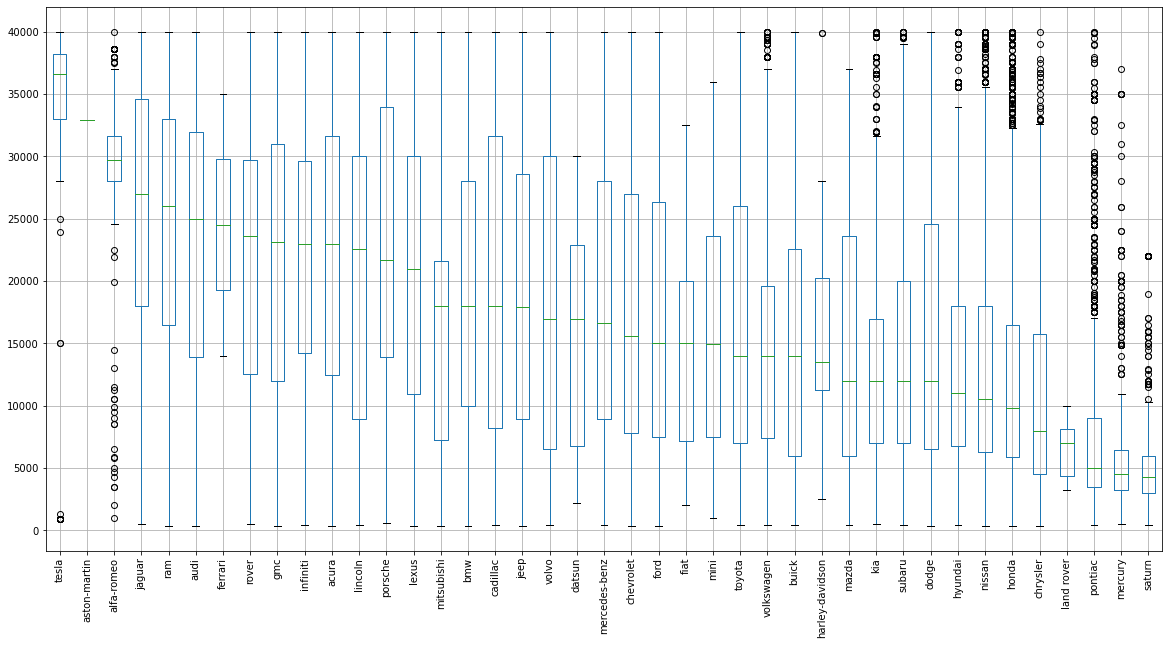

In [17]:
# price boxplots by make - dataset A
grouped_A = data_A.groupby(['make'])
df2_A = pd.DataFrame({col:vals['price'] for col,vals in grouped_A})
meds_A = df2_A.median()
meds_A.sort_values(ascending=False,inplace=True)
df2_A = df2_A[meds_A.index]

make_price_A = df2_A.boxplot(rot=90,figsize=(20,10))

In [18]:
print("Descriptive statistics: Data Set B")
data_B.describe(include='all')

Descriptive statistics: Data Set B


,price,year,mileage,city,state,vin,make,model
count,730358.000000,730358.000000,730358.000000,730358,730358,730358,730358,730358
unique,NaN,NaN,NaN,2405,51,730316,51,2193
top,NaN,NaN,NaN,houston,tx,1fadp3e24el218186,ford,silverado
freq,NaN,NaN,NaN,10684,79815,2,93876,19647
mean,20685.416359,2013.878557,27634.871610,NaN,NaN,NaN,NaN,NaN
std,8385.295147,2.598876,17550.231814,NaN,NaN,NaN,NaN,NaN
min,6995.000000,2000.000000,3.106855,NaN,NaN,NaN,NaN,NaN
25%,13998.000000,2013.000000,14546.916481,NaN,NaN,NaN,NaN,NaN
50%,18977.000000,2014.000000,23687.283891,NaN,NaN,NaN,NaN,NaN
75%,26487.000000,2016.000000,38327.406022,NaN,NaN,NaN,NaN,NaN


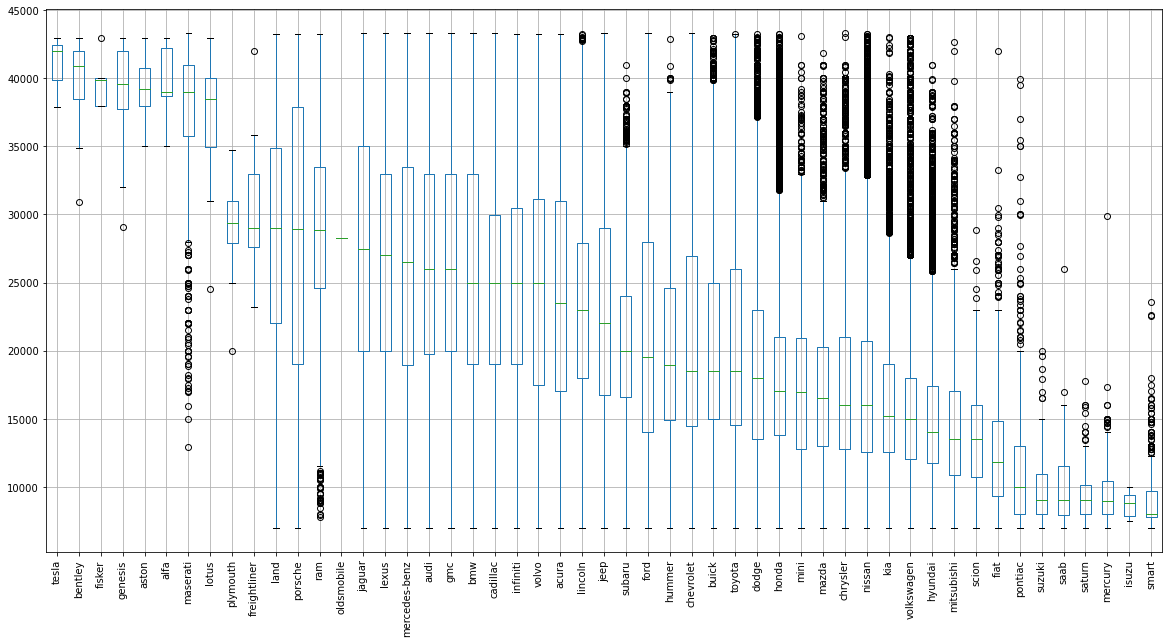

In [19]:
# price boxplots by make - dataset B
grouped_B = data_B.groupby(['make'])
df2_B = pd.DataFrame({col:vals['price'] for col,vals in grouped_B})
meds_B = df2_B.median()
meds_B.sort_values(ascending=False,inplace=True)
df2_B = df2_B[meds_B.index]
make_price_B = df2_B.boxplot(rot=90,figsize=(20,10))

In [20]:
print("Descriptive statistics: Data Set C")
data_C.describe(include='all')

Descriptive statistics: Data Set C


,price,make,model,year,title_status,mileage,color,vin,state,country
count,2137.000000,2137,2137,2137.000000,2137,2137.000000,2137,2137,2137,2137
unique,NaN,25,113,NaN,2,NaN,45,2136,41,2
top,NaN,ford,door,NaN,clean vehicle,NaN,white,1gnevhkw8jj148388,pa,usa
freq,NaN,1019,476,NaN,2101,NaN,602,2,253,2130
mean,18436.211511,NaN,NaN,2017.380908,NaN,40963.737482,NaN,NaN,NaN,NaN
std,9068.822887,NaN,NaN,1.979760,NaN,27543.325791,NaN,NaN,NaN,NaN
min,2000.000000,NaN,NaN,2003.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,11400.000000,NaN,NaN,2016.000000,NaN,21055.000000,NaN,NaN,NaN,NaN
50%,17300.000000,NaN,NaN,2018.000000,NaN,33965.000000,NaN,NaN,NaN,NaN
75%,25000.000000,NaN,NaN,2019.000000,NaN,51441.000000,NaN,NaN,NaN,NaN


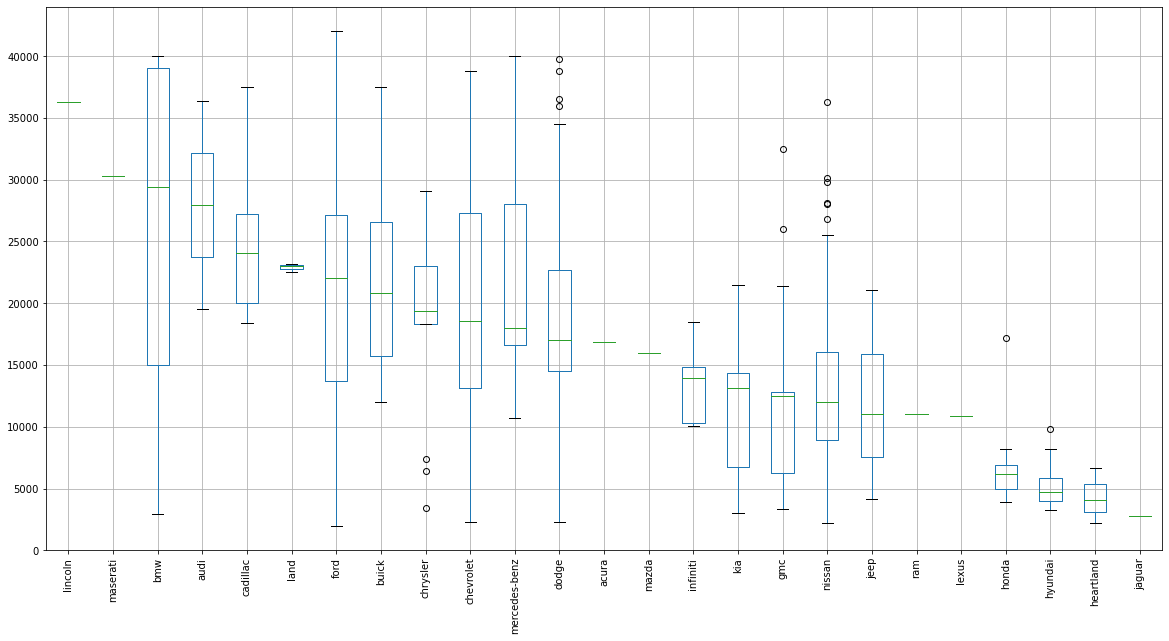

In [21]:
# price boxplots by make - dataset C
grouped_C = data_C.groupby(['make'])
df2_C = pd.DataFrame({col:vals['price'] for col,vals in grouped_C})
meds_C = df2_C.median()
meds_C.sort_values(ascending=False,inplace=True)
df2_C = df2_C[meds_C.index]
make_price_C = df2_C.boxplot(rot=90,figsize=(20,10))

In [22]:
print("Descriptive statistics: Master Data Set")
master_set.describe(include='all')

Descriptive statistics: Master Data Set


,region,price,year,make,model,condition,cylinders,fuel,mileage,transmission,vin,drive,size,type,paint_color,state,city,title_status,color,country
count,203207,935702.000000,935702.000000,935702,935702,203207,144576,203205,935702.000000,203198,858309,153986,74976,178834,162285,935702,730358,2137,2137,2137
unique,404,NaN,NaN,59,16694,6,8,5,NaN,3,782140,3,4,13,12,104,2405,2,45,2
top,columbus,NaN,NaN,ford,silverado,good,6 cylinders,gas,NaN,automatic,1fmju1jt1hea52352,fwd,full-size,sedan,white,tx,houston,clean vehicle,white,usa
freq,2057,NaN,NaN,125337,20544,101145,58285,174587,NaN,139775,261,60430,40724,51269,40079,79815,10684,2101,602,2130
mean,NaN,19905.653604,2013.310060,NaN,NaN,NaN,NaN,NaN,40307.793495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9119.085685,4.752263,NaN,NaN,NaN,NaN,NaN,38714.481453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,359.000000,1936.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,12998.000000,2012.000000,NaN,NaN,NaN,NaN,NaN,16070.518173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,18400.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,27100.237397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,26300.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,50448.872530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


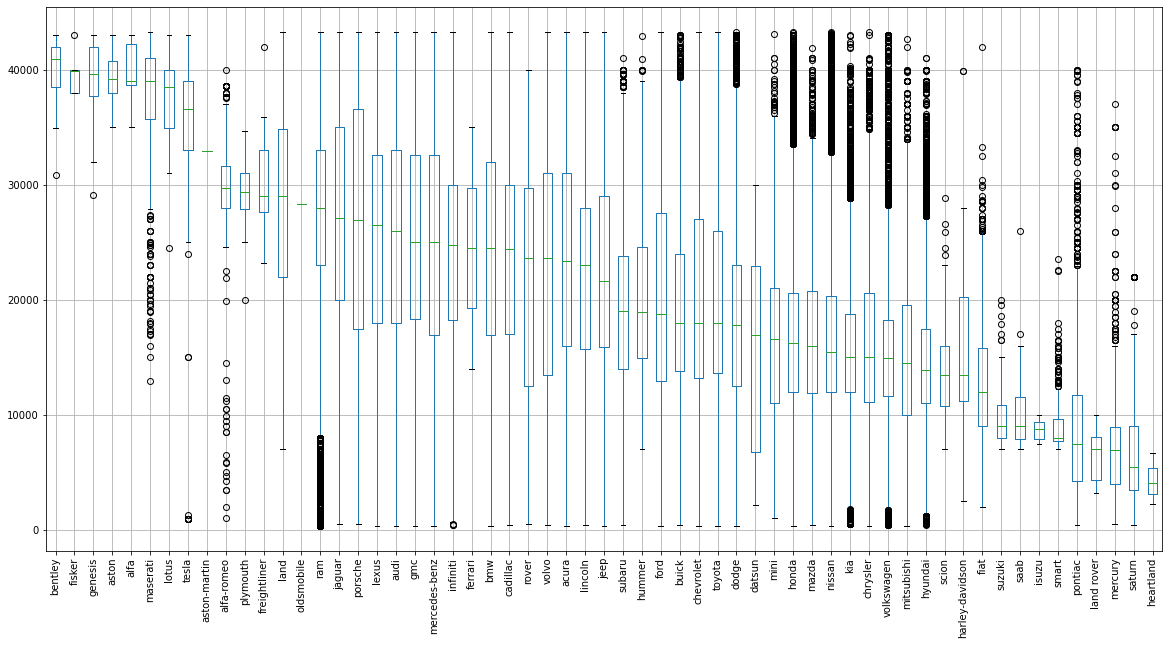

In [23]:
# price boxplots by make - master set
grouped_m = master_set.groupby(['make'])
df2_m = pd.DataFrame({col:vals['price'] for col,vals in grouped_m})
meds_m = df2_m.median()
meds_m.sort_values(ascending=False,inplace=True)
df2_m = df2_m[meds_m.index]
make_price_m = df2_m.boxplot(rot=90,figsize=(20,10))

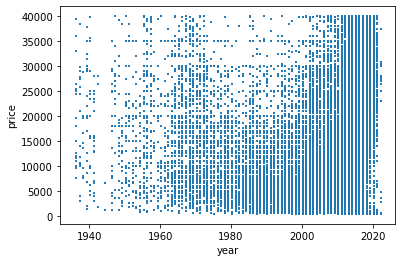

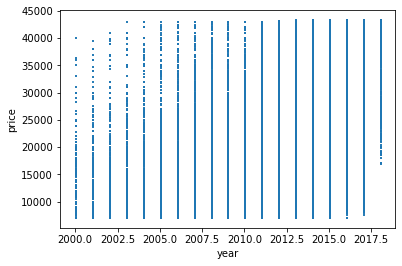

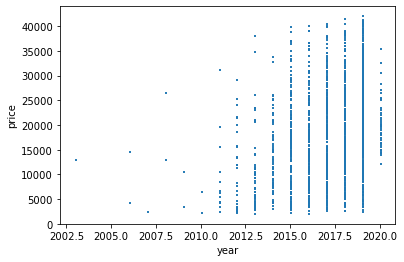

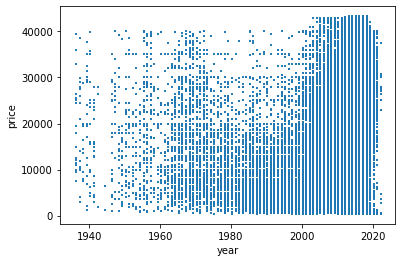

In [24]:
# year vs price
year_miles_A = data_A.plot.scatter(x='year',y='price',marker=',',s=1)
year_miles_B = data_B.plot.scatter(x='year',y='price',marker=',',s=1)
year_miles_C = data_C.plot.scatter(x='year', y='price',marker=',',s=1)
year_miles_master = master_set.plot.scatter(x='year', y='price',marker=',',s=1)

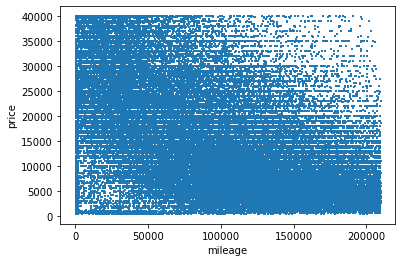

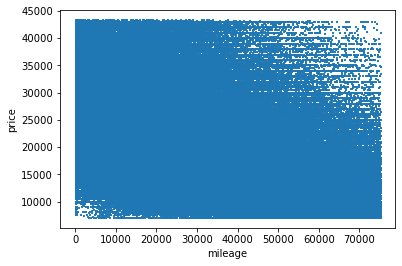

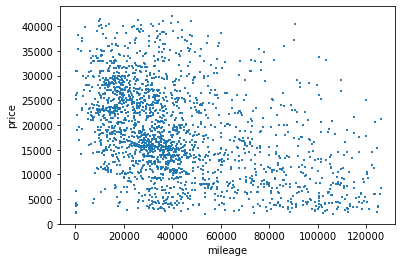

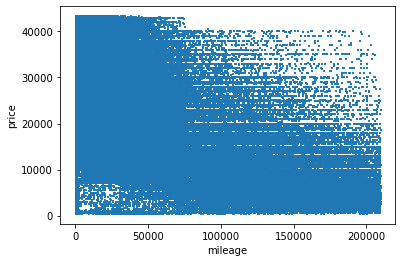

In [25]:
# mileage vs price
miles_price_A = data_A.plot.scatter(x='mileage',y='price',marker=',',s=1)
miles_price_B = data_B.plot.scatter(x='mileage',y='price',marker=',',s=1)
miles_price_C = data_C.plot.scatter(x='mileage', y='price',marker=',',s=1)
miles_price_master = master_set.plot.scatter(x='mileage', y='price',marker=',',s=1)

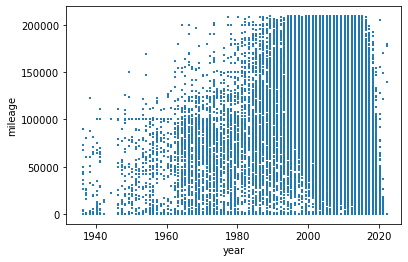

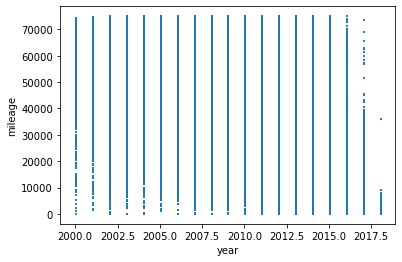

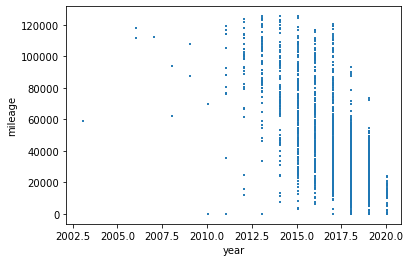

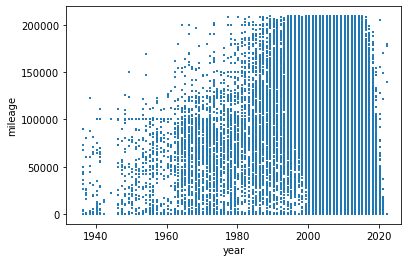

In [26]:
# year vs mileage
miles_price_A = data_A.plot.scatter(x='year',y='mileage',marker=',',s=1)
miles_price_B = data_B.plot.scatter(x='year',y='mileage',marker=',',s=1)
miles_price_C = data_C.plot.scatter(x='year',y='mileage',marker=',',s=1)
miles_price_master = master_set.plot.scatter(x='year',y='mileage',marker=',',s=1)